<a href="https://colab.research.google.com/github/laragervasi-coder/DS---Proyecto-Final-/blob/main/ProyectoDS_delitosCABA_Gervasi_Lara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Visualizaciones en Phyton**

## **Primera Entrega**

Archivo: ProyectoDS_delitosCABA_Gervasi_Lara.ipynb

### **Abstract**

Este proyecto utiliza el dataset "delitos_2024" proveniente de la página del Gobierno de la Ciudad de Buenos Aires. La base de datos incluye datos sobre delitos en la ciudad, diferenciando las comunas, los días y el tipo de delitos cometido.

El objetivo del proyecto es explorar la cantidad y tipo de delitos cometidos en las distintas comunas y, desde una perspectiva descriptiva y visual, responder preguntas de interés sobre los mismos. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y pandas.

Se comienza con una limpieza básica y detección de valores faltantes, seguida de visualizaciones que permiten responder preguntas clave. Este análisis exploratorio permitirá sentar las bases para futuros trabajos de predicción, segmentación o recomendaciones basadas en contenido.

## **Preguntas / Hipótesis de interés**

*   ¿Qué tipo de delito predomina en la Ciudad de Buenos Aires?
*   ¿Cuan frecuente es el uso de arma en los delitos?

*   ¿Cuáles son las comunas con mayor cantidad de delitos?
*   ¿Qué tipos de delitos se cometen en cada comuna?


*   ¿Cuan frecuente es el uso de moto en los delitos?

* ¿Cuál es el modus operandi que se utiliza en los delitos cometidos?




## **Objetivo del Proyecto**

El objetivo de este proyecto es desarrollar un modelo predictivo que permita estimar la cantidad y tipos de delitos cometidos en la Ciudad de Buenos Aires a partir de los datos proporcionados por el Ministerio de Seguridad. Esta predicción facilitará el análisis de los mismos, ayudando a enteder cómo se distribuyen en las comunas los delitos, y podrá servir como base para optimizar la planificación de la seguridad en la ciudad.

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette("bright")

# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/delitos_2024.csv')
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1399612,2024,ENERO,LUNES,2024-01-01,17.0,Robo,Robo total,SI,NO,CHACARITA,15.0,-34.585182,-58.453967,1
1,1399613,2024,ENERO,LUNES,2024-01-01,6.0,Robo,Robo total,SI,NO,CHACARITA,15.0,-34.584186,-58.453476,1
2,1399614,2024,ENERO,LUNES,2024-01-01,1.0,Hurto,Hurto total,NO,NO,MATADEROS,9.0,-34.664360,-58.502121,1
3,1399615,2024,ENERO,LUNES,2024-01-01,19.0,Robo,Robo total,NO,NO,PALERMO,14.0,-34.564851,-58.434855,1
4,1399616,2024,ENERO,LUNES,2024-01-01,20.0,Hurto,Hurto total,NO,NO,SAN NICOLAS,1.0,-34.605522,-58.391176,1


### **Missing Values**

In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
barrio,3922
comuna,3922
latitud,3834
longitud,3834
franja,47


Se encontraron valores nulos en las columnas barrio, comuna, latitud, longitud y franja. Se dejarán o se imputaran según la necesidad del análisis.

## **Análisis Univariado**
**Cantidad de delitos según su tipo**

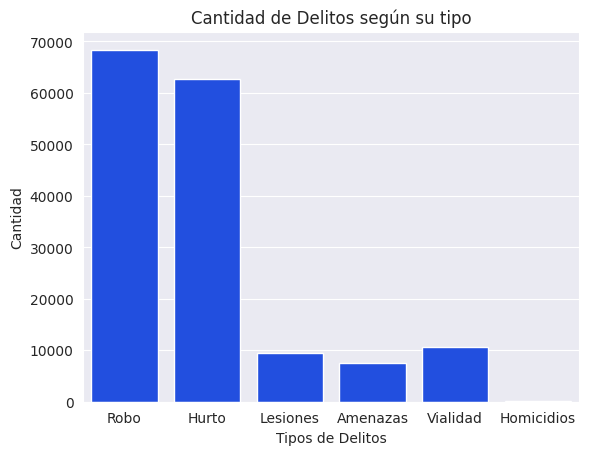

In [22]:
sns.countplot(x='tipo', data=df)
plt.xlabel('Tipos de Delitos')
plt.ylabel('Cantidad')
plt.title('Cantidad de Delitos según su tipo')
plt.show()



El tipo de delito "homicidio" no es posible visualizarlo debido a la baja cantidad del mismo, en comparación con el resto de los delitos.

**Uso de Arma**

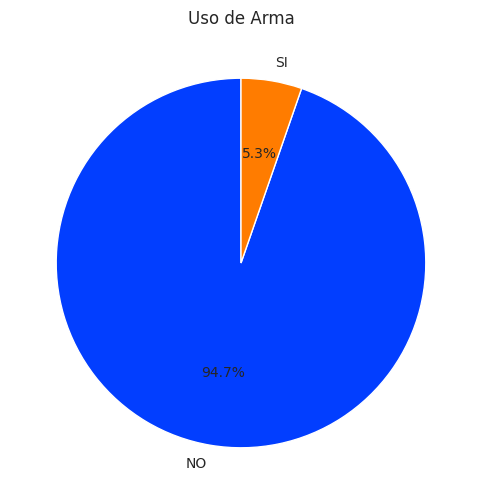

In [35]:
Columna='uso_arma'
conteo = df['uso_arma'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90)
plt.title(f"{'Uso de Arma'}")
plt.show()


## **Análisis Bivariado**

**Cantidad de Delitos por tipo y comuna**

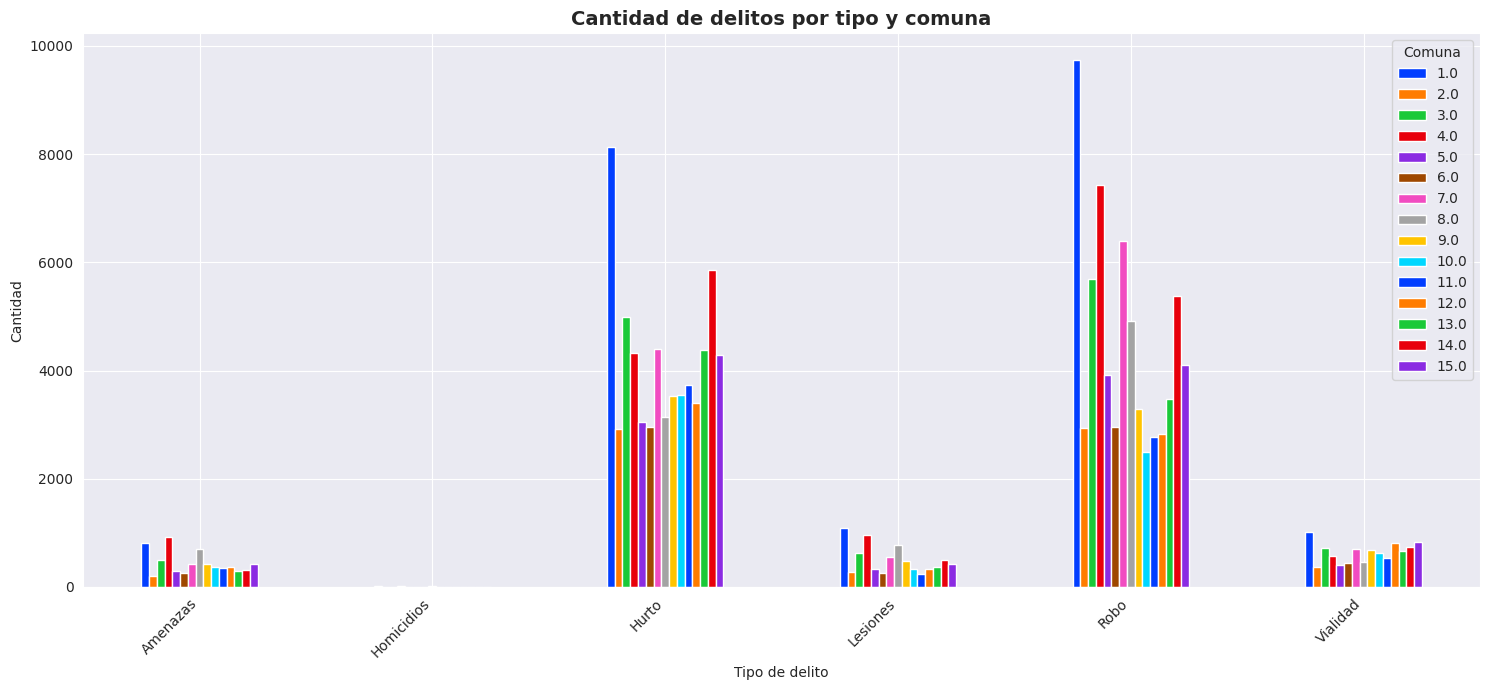

In [37]:
conteo = df.groupby(["tipo", "comuna"]).size().unstack(fill_value=0)
conteo.plot(kind="bar", figsize=(15,7))

plt.title("Cantidad de delitos por tipo y comuna", fontsize=14, fontweight="bold")
plt.xlabel("Tipo de delito")
plt.ylabel("Cantidad")
plt.legend(title="Comuna")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **Análisis Multivariado**

**Uso de moto asociado al tipo de delito**

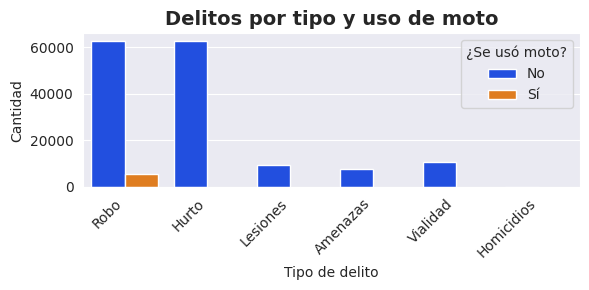

In [52]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x="tipo", hue="uso_moto")

plt.title("Delitos por tipo y uso de moto", fontsize=14, fontweight="bold")
plt.xlabel("Tipo de delito")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.legend(title="¿Se usó moto?", labels=["No", "Sí"])
plt.tight_layout()
plt.show()

**Patrones de modus operandi por tipo de delito**

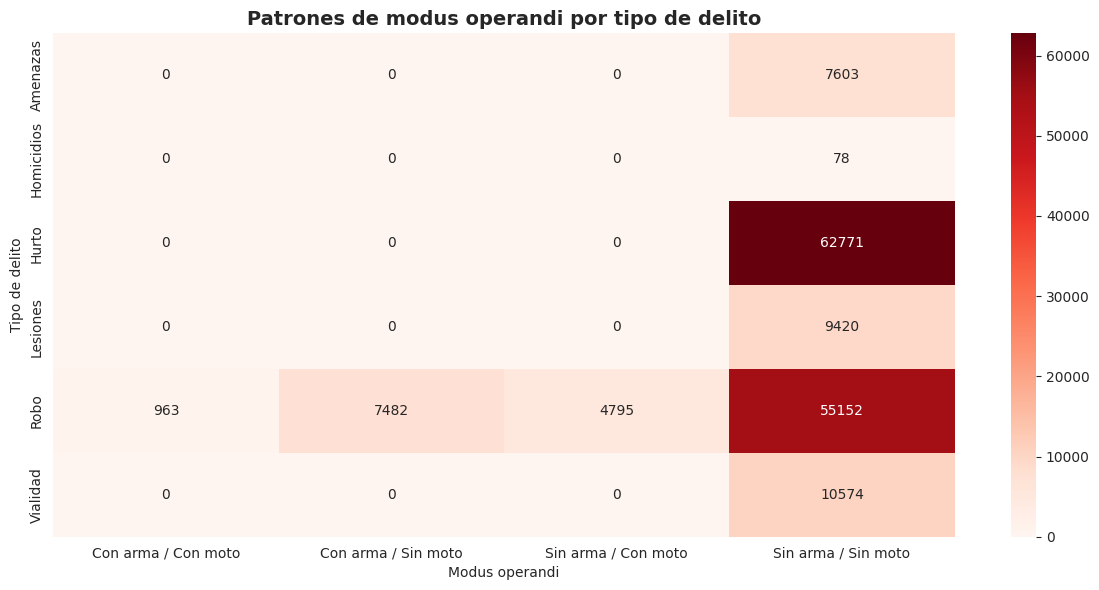

In [59]:
conteo = df.groupby(["tipo", "uso_arma", "uso_moto"]).size().reset_index(name="cantidad")
conteo["modus"] = conteo["uso_arma"].map({"NO":"Sin arma", "SI":"Con arma"}) + " / " + conteo["uso_moto"].map({"NO":"Sin moto", "SI":"Con moto"})
pivot = conteo.pivot(index="tipo", columns="modus", values="cantidad").fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Reds")

plt.title("Patrones de modus operandi por tipo de delito", fontsize=14, fontweight="bold")
plt.xlabel("Modus operandi")
plt.ylabel("Tipo de delito")
plt.tight_layout()
plt.show()

## **Conclusiones preliminares**



*   Se visualiza que el tipo de delito *"hurto"* es el mas cometido en la Ciudad de Buenos Aires.
*   Una gran proporción de los delitos es sin utilización de arma.
* Se observa que la *"Comuna 1"* es la que más delitos presenta en la ciudad.
* En los delitos de tipo "Robo" una prequeña proporción de los mismo comprende la utilización de moto.
* El modus operandi más comunmente usado en el hurto es sin arma y sin moto.







## **Acciones que podría realizar en el dataset**
***Eliminación de columnas poco informativas***


In [67]:
df.drop(columns=['id-mapa', 'latitud', 'longitud'], inplace=True, errors='ignore')
df.head()

,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,cantidad
0,2024,ENERO,LUNES,2024-01-01,17.0,Robo,Robo total,SI,NO,CHACARITA,15.0,1
1,2024,ENERO,LUNES,2024-01-01,6.0,Robo,Robo total,SI,NO,CHACARITA,15.0,1
2,2024,ENERO,LUNES,2024-01-01,1.0,Hurto,Hurto total,NO,NO,MATADEROS,9.0,1
3,2024,ENERO,LUNES,2024-01-01,19.0,Robo,Robo total,NO,NO,PALERMO,14.0,1
4,2024,ENERO,LUNES,2024-01-01,20.0,Hurto,Hurto total,NO,NO,SAN NICOLAS,1.0,1


In [68]:
original_size = df.shape[0]
print(f"Tamaño original del dataset: {original_size}")

Tamaño original del dataset: 158838


In [70]:
# Calcular cuartiles
Q1 = df["franja"].quantile(0.25)
Q3 = df["franja"].quantile(0.75)
IQR = Q3 - Q1

# Límites de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

# Filtrar outliers
outliers = df[(df["franja"] < limite_inferior) | (df["franja"] > limite_superior)]
print("Cantidad de outliers:", len(outliers))

Q1: 8.0
Q3: 18.0
IQR: 10.0
Límite inferior: -7.0
Límite superior: 33.0
Cantidad de outliers: 0


Como la franja horaria está acotada a 0–23, es muy probable que no aparezcan outliers reales (salvo que tenga errores de carga, como horas negativas o >23).
En ese caso, el IQR va a servir más como validación de calidad de datos que como análisis de patrones.